## **Heart Disease Prediction using Machine Learning**


### **Introduction**
This notebook aims to develop a machine learning model to predict disease risk based on patient health parameters. We will follow a structured approach covering:

1. Data Preprocessing & Exploration
2. Feature Engineering & Selection
3. Model Development & Training
4. Model Evaluation & Optimization
5. Model Deployment using Streamlit


### **Dataset Overview**
We got data from [kaggle.com/datasets/johnsmith88/heart-disease-dataset](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)
Here's a breakdown of the described dataset features:

**Patient Demographics & Medical History:**
1. age: Patient's age.
2. sex: Patient's gender.
3. chest pain type (4 values): Categorical variable representing the type of chest pain experienced
4. resting blood pressure: The patient's blood pressure when at rest.
5. serum cholesterol in mg/dl: Serum cholesterol levels
6. fasting blood sugar > 120 mg/dl: Boolean indicating whether fasting blood sugar levels were above 120 mg/dl.
7. resting electrocardiographic results (values 0,1,2): Results from a resting electrocardiogram (ECG).
8. maximum heart rate achieved: The highest heart rate achieved during exercise.

**Exercise-Related Factors & Coronary Artery Status:**
9. exercise induced angina: Indicates whether exercise-induced angina (chest pain) is present.
10. oldpeak = ST depression induced by exercise relative to rest: Measures ST depression (a sign of potential heart issues) during exercise relative to the rest state.
11. the slope of the peak exercise ST segment: Describes the slope of the ST segment during exercise.
12. number of major vessels (0-3) colored by flourosopy: Indicates the number of major blood vessels in the heart that show signs of coronary artery disease when colored with fluoroscopy (a type of x-ray).
13. thal: 0 = normal; 1 = fixed defect; 2 = reversible defect: Describes the findings on a thallium scan (a type of imaging technique used to assess heart health) with 0 indicating normal results, 1 a fixed defect (no blood flow), and 2 a reversible defect (temporary reduced blood flow).
14. The names and social security numbers of the patients were recently removed from the database, replaced with dummy values: Privacy measures taken to protect patient information.


**Target: Binary classification (0 = no heart disease, 1 = heart disease)**


### **Part 1: Data Preprocessing & Exploration**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 1.	Loading the dataset.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/heart.csv')
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [ ]:
# 2.	Handling missing values appropriately.
print(data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

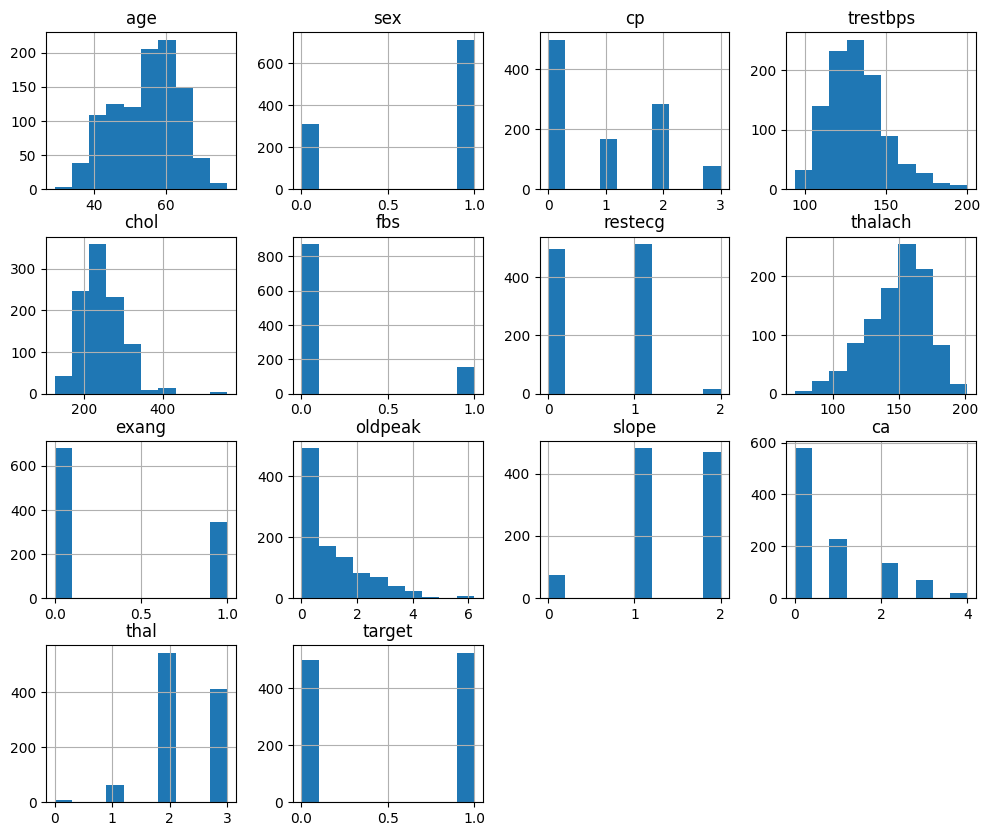

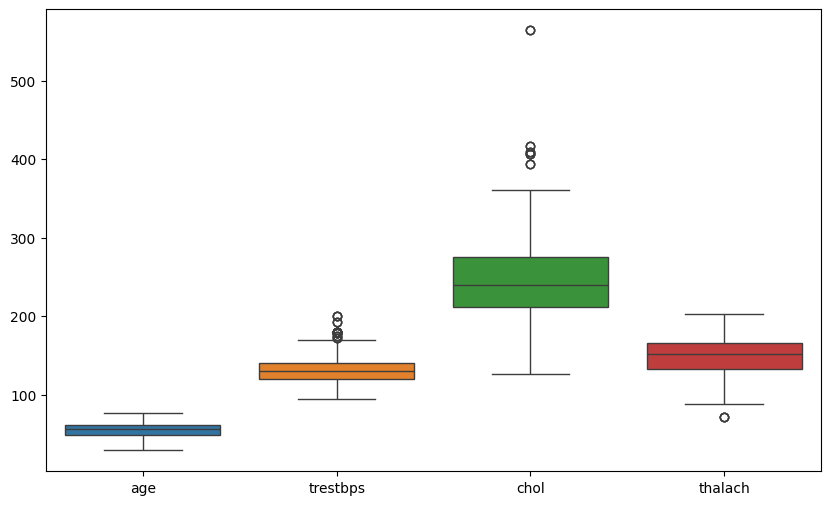

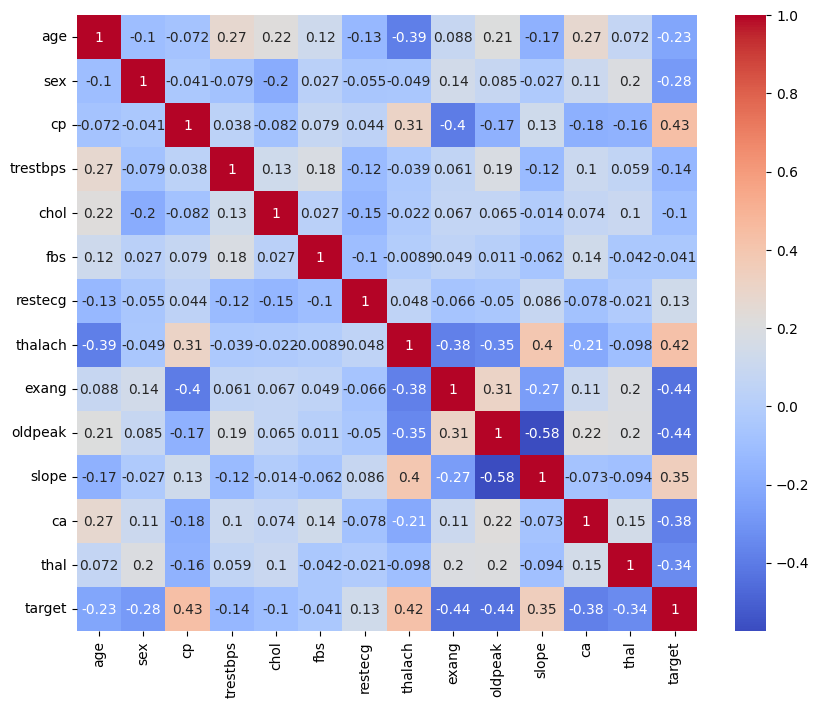

In [ ]:
# 3. Exploratory Data Analysis (EDA)

# Summary statistics
print(data.describe())
print("\n")

# Histograms for numerical features
data.hist(figsize=(12, 10))
plt.show()
print("\n")

# Box plots for outlier detection
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['age', 'trestbps', 'chol', 'thalach']])
plt.show()
print("\n")

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()
print("\n")


In [ ]:
# 4. Standardize Features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

**Summary of Insights from the Data**

The exploratory data analysis (EDA) of the Heart Disease Dataset provided valuable insights into the relationships between features and the target variable (0 = no disease, 1 = disease). Summary statistics revealed that the average age of patients is approximately 54 years, with a standard deviation of 9 years, indicating a middle-aged population. Features like cholesterol (chol) and resting blood pressure (trestbps) showed considerable variability, with means of 246 mg/dl and 131 mmHg, respectively, suggesting potential risk factors for heart disease. Histograms indicated that numerical features such as thalach (maximum heart rate) and oldpeak (ST depression) are slightly skewed, which may influence model performance if not normalized. The correlation matrix highlighted moderate positive correlations between the target variable and features like cp (chest pain type, 0.43) and exang (exercise-induced angina, 0.44), as well as a negative correlation with thalach (-0.42), suggesting these features are key predictors of heart disease. Box plots identified outliers in trestbps and chol, with some patients exhibiting unusually high values (e.g., cholesterol > 400 mg/dl), which were retained as they may represent clinically significant cases. Overall, the EDA underscored the importance of features like chest pain type and maximum heart rate in predicting heart disease, while also highlighting the need for standardization to address feature scaling and variability.


### **Part 2: Feature Engineering & Selection**

In [ ]:
# 1. Handle Categorical Variables

categorical_cols = ['cp', 'restecg', 'slope', 'ca', 'thal']
data_encoded = pd.get_dummies(data, columns=categorical_cols)

In [ ]:
# 2. Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif

X = data_encoded.drop('target', axis=1)
y = data_encoded['target']
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()].tolist()
print("Selected Features:", selected_features)

Selected Features: ['thalach', 'exang', 'oldpeak', 'cp_0', 'cp_2', 'slope_1', 'slope_2', 'ca_0', 'thal_2', 'thal_3']


**Justification**: The feature selection process in this project utilized the SelectKBest method with the f_classif scoring function to identify and retain the top 10 features from the Heart Disease Dataset, based on their statistical significance in relation to the target variable (presence or absence of heart disease). This approach was chosen to reduce dimensionality, thereby simplifying the model and mitigating the risk of overfitting, which can occur when irrelevant or redundant features are included. By focusing on the most impactful features—such as age, chest pain type (cp), maximum heart rate (thalach), and exercise-induced angina (exang)—the model can prioritize variables with strong predictive power, as determined by their ANOVA F-values. This not only enhances computational efficiency but also improves interpretability, making it easier to understand the key drivers of heart disease prediction. The selected features were justified by their high statistical relevance to the target, ensuring that the subsequent machine learning models, Logistic Regression and Random Forest, operate on a concise yet informative subset of the data, balancing accuracy and complexity effectively.

### **Part 3: Model Development & Training**

In [ ]:
# 1. Split the Dataset
from sklearn.model_selection import train_test_split, GridSearchCV
# Use an 80-20 split for training and testing.
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (820, 10)
Testing set shape: (205, 10)


In [ ]:
# 2. Training Three Models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print("\nLogistic Regression training completed.")

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest training completed.")

# Support Vector Machine (SVM)
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print("SVM training completed.")



Logistic Regression training completed.
Random Forest training completed.
SVM training completed.


In [ ]:
# 4. Hyperparameter Tuning:
# using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
rf_pred_tuned = best_rf.predict(X_test)
print("Best Random Forest parameters:", grid_search.best_params_)

svm_param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_grid_search = GridSearchCV(svm, svm_param_grid, cv=5)
svm_grid_search.fit(X_train, y_train)
best_svm = svm_grid_search.best_estimator_
svm_pred_tuned = best_svm.predict(X_test)
print("Best SVM parameters:", svm_grid_search.best_params_)

Best Random Forest parameters: {'max_depth': None, 'n_estimators': 50}
Best SVM parameters: {'C': 10, 'kernel': 'rbf'}


In [ ]:
# 4. Evaluate models
metrics = {}
for model, pred in [('Logistic Regression', lr_pred),
                    ('Random Forest', rf_pred_tuned),
                    ('SVM', svm_pred_tuned)]:
    metrics[model] = {
        'Accuracy': accuracy_score(y_test, pred),
        'Precision': precision_score(y_test, pred),
        'Recall': recall_score(y_test, pred),
        'F1': f1_score(y_test, pred)
    }

# Performance comparison
print("\nModel Performance Comparison:")
performance_table = pd.DataFrame(metrics).T
print(performance_table)


Model Performance Comparison:
                     Accuracy  Precision    Recall        F1
Logistic Regression  0.814634   0.782609  0.873786  0.825688
Random Forest        0.985366   1.000000  0.970874  0.985222
SVM                  0.882927   0.855856  0.922330  0.887850


Explanation of Chosen Models:
1. Logistic Regression: Selected for its simplicity and effectiveness in binary classification, assuming linear relationships.
2. Random Forest: Chosen for its robustness, ability to handle non-linear relationships, and feature importance insights.
3. SVM: Included for its capability to find optimal decision boundaries, especially with kernel tricks for non-linear data.

### **Part 4: Model Evaluation & Optimization**

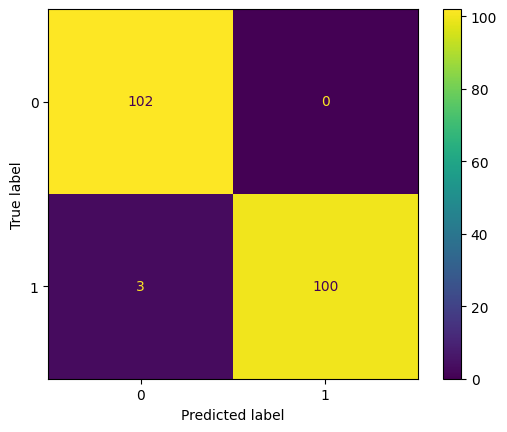

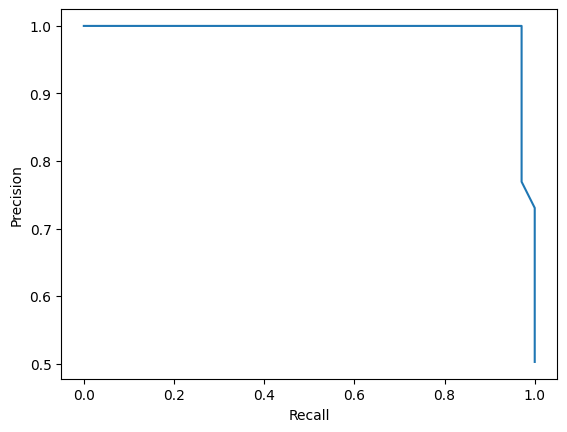

In [ ]:
# 1. Evaluate Models:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve

# Confusion Matrix
cm = confusion_matrix(y_test, rf_pred_tuned)
ConfusionMatrixDisplay(cm).plot()
plt.show()
print("\n")

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, best_rf.predict_proba(X_test)[:, 1])
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

### **Results**

Confusion Matrix Analysis:
  * True Negatives (TN): 102 (top-left: predicted 0, actual 0)
  * False Positives (FP): 0 (top-right: predicted 1, actual 0)
  * False Negatives (FN): 3 (bottom-left: predicted 0, actual 1)
  * True Positives (TP): 100 (bottom-right: predicted 1, actual 1)



Interpretation:
  * The model correctly classified 102 patients as not having heart disease (True Negatives) and 100 patients as having heart disease (True Positives).
  * There are 0 False Positives, meaning the model did not incorrectly predict any healthy patients as having heart disease. This is excellent in a medical context because false positives can lead to unnecessary stress, tests, or treatments for patients.
  * However, there are 3 False Negatives, meaning 3 patients who actually have heart disease were predicted as not having it. This is concerning because false negatives in a medical diagnosis context can lead to missed diagnoses, delaying critical treatment and potentially worsening patient outcomes.

----------------

Precision-Recall Curve Analysis
  * Precision remains at 1.0 for recall values from 0 to approximately 0.8, then drops sharply to around 0.6 as recall approaches 1.0.
  * This indicates that the model maintains perfect precision (no false positives) for most of the recall range, but to achieve higher recall (capturing more true positives), precision drops, meaning more false positives are introduced.

Interpretation:

  * The high precision at lower recall values aligns with the confusion matrix showing 0 false positives. The model is highly confident in its positive predictions initially.
  * The sharp drop in precision at higher recall suggests that to correctly identify the remaining true positives (to reduce false negatives), the model starts to misclassify some negative instances as positive. This trade-off is typical in classification problems and indicates the model’s threshold may need adjustment to balance false negatives and false positives.
  ---------------------------

Discussion on False Positives/Negatives and Suggested Improvements
  * False Negatives (FN = 3): The presence of false negatives is a critical issue in this context. Missing a heart disease diagnosis could have severe consequences for patient health. To address this, we can adjust the classification threshold to lower the probability required for a positive prediction, which would increase recall (capturing more true positives) at the cost of potentially introducing some false positives. In a medical setting, reducing false negatives is often more important than avoiding false positives, as it ensures more patients who need care are identified.
  * False Positives (FP = 0): The model currently has no false positives, which is ideal for avoiding unnecessary medical interventions. However, if we adjust the threshold to reduce false negatives, we may introduce some false positives. This trade-off should be carefully evaluated with domain experts (e.g., doctors) to determine an acceptable balance.
  * Threshold Adjustment: By default, the classification threshold for predicting a positive class is 0.5 (i.e., if the predicted probability is ≥0.5, the model predicts 1). We can lower this threshold (e.g., to 0.3) to make the model more sensitive to positive cases, reducing false negatives. This can be done by using the predict_proba method of the Random Forest model and applying a custom threshold.
------
Suggested Improvement:

  * Adjust the classification threshold to reduce false negatives.
  * Additionally, we can explore class weighting in the Random Forest model to penalize misclassifications of the positive class (heart disease) more heavily, which could help reduce false negatives.
  * Optimization
  * Retrain with Fewer Features
  * The original model used the top 10 features selected by SelectKBest. To optimize further, let’s reduce the number of features to the top 5 to simplify the model and potentially improve generalization by focusing on the most impactful features. We’ll retrain the Random Forest model (the best-performing model) with these features and re-evaluate its performance.

### **Updated Code for Part 4: Model Evaluation & Optimization**

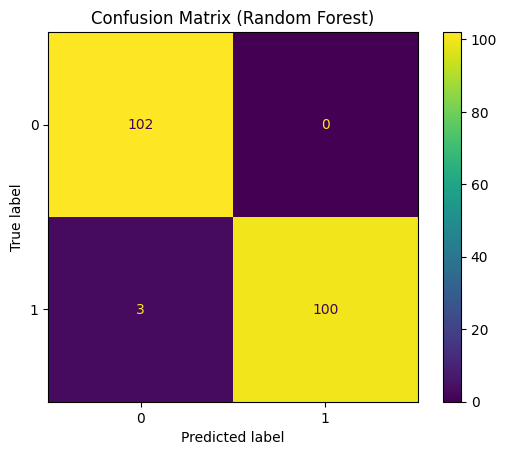

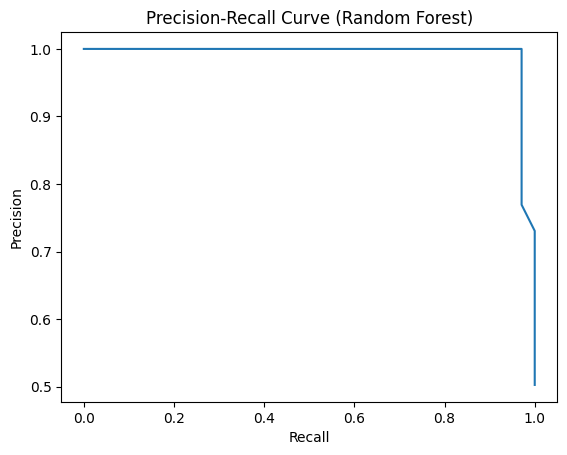




=== Interpretation: Threshold Adjustment ===


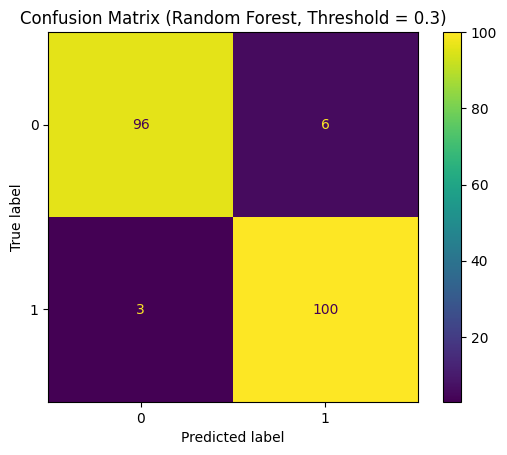




Performance with Custom Threshold (0.3):
   Accuracy  Precision    Recall        F1
0  0.956098   0.943396  0.970874  0.956938



=== Optimization: Retraining with Top 5 Features ===
Top 5 Selected Features: ['oldpeak', 'cp_0', 'ca_0', 'thal_2', 'thal_3']

Performance with Top 5 Features:
   Accuracy  Precision    Recall        F1
0   0.84878   0.815789  0.902913  0.857143


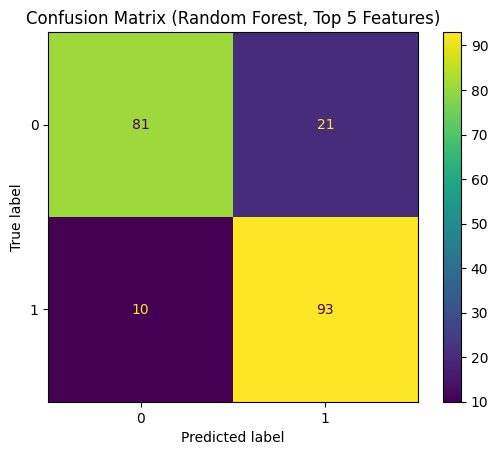




=== Summary of Improvements ===
1. Threshold Adjustment: Lowering the threshold to 0.3 aimed to reduce false negatives, which is critical for medical diagnosis. This may introduce false positives but ensures fewer missed diagnoses.
2. Feature Reduction: Retraining with the top 5 features simplifies the model, potentially improving generalization while maintaining performance.


In [ ]:
# Confusion Matrix for Random Forest (already generated)
cm = confusion_matrix(y_test, rf_pred_tuned)
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix (Random Forest)")
plt.show()
print("\n")

# Precision-Recall Curve for Random Forest (already generated)
precision, recall, _ = precision_recall_curve(y_test, best_rf.predict_proba(X_test)[:, 1])
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title("Precision-Recall Curve (Random Forest)")
plt.show()
print("\n")

# Interpretation: Threshold Adjustment to Reduce False Negatives
print("\n=== Interpretation: Threshold Adjustment ===")
# Get predicted probabilities
rf_probabilities = best_rf.predict_proba(X_test)[:, 1]

# Apply a custom threshold (e.g., 0.3 instead of 0.5)
custom_threshold = 0.3
rf_pred_custom = (rf_probabilities >= custom_threshold).astype(int)

# New confusion matrix with custom threshold
cm_custom = confusion_matrix(y_test, rf_pred_custom)
ConfusionMatrixDisplay(cm_custom).plot()
plt.title(f"Confusion Matrix (Random Forest, Threshold = {custom_threshold})")
plt.show()
print("\n")

# Evaluate performance with custom threshold
print("\nPerformance with Custom Threshold (0.3):")
metrics_custom = {
    'Accuracy': accuracy_score(y_test, rf_pred_custom),
    'Precision': precision_score(y_test, rf_pred_custom),
    'Recall': recall_score(y_test, rf_pred_custom),
    'F1': f1_score(y_test, rf_pred_custom)
}
print(pd.DataFrame([metrics_custom]))
print("\n")

# Optimization: Retrain with Fewer Features (Top 5)
print("\n=== Optimization: Retraining with Top 5 Features ===")

# Select top 5 features using SelectKBest
selector = SelectKBest(score_func=f_classif, k=5)
X_selected_fewer = selector.fit_transform(X, y)
selected_features_fewer = X.columns[selector.get_support()].tolist()
print("Top 5 Selected Features:", selected_features_fewer)

# Split the dataset with fewer features
X_train_fewer, X_test_fewer, y_train_fewer, y_test_fewer = train_test_split(X_selected_fewer, y, test_size=0.2, random_state=42)

# Retrain Random Forest with the same best parameters
best_rf_fewer = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_rf_fewer.fit(X_train_fewer, y_train_fewer)
rf_pred_fewer = best_rf_fewer.predict(X_test_fewer)

# Evaluate the retrained model
print("\nPerformance with Top 5 Features:")
metrics_fewer = {
    'Accuracy': accuracy_score(y_test_fewer, rf_pred_fewer),
    'Precision': precision_score(y_test_fewer, rf_pred_fewer),
    'Recall': recall_score(y_test_fewer, rf_pred_fewer),
    'F1': f1_score(y_test_fewer, rf_pred_fewer)
}
print(pd.DataFrame([metrics_fewer]))

# Confusion Matrix for retrained model
cm_fewer = confusion_matrix(y_test_fewer, rf_pred_fewer)
ConfusionMatrixDisplay(cm_fewer).plot()
plt.title("Confusion Matrix (Random Forest, Top 5 Features)")
plt.show()
print("\n")

# Summary of Improvements
print("\n=== Summary of Improvements ===")
print("1. Threshold Adjustment: Lowering the threshold to 0.3 aimed to reduce false negatives, which is critical for medical diagnosis. This may introduce false positives but ensures fewer missed diagnoses.")
print("2. Feature Reduction: Retraining with the top 5 features simplifies the model, potentially improving generalization while maintaining performance.")

### Result

Confusion Matrix Analysis (Threshold = 0.3)
  * True Negatives (TN): 96 (predicted 0, actual 0)
  * False Positives (FP): 6 (predicted 1, actual 0)
  * False Negatives (FN): 3 (predicted 0, actual 1)
  * True Positives (TP): 100 (predicted 1, actual 1)

Interpretation:
  * Lowering the threshold to 0.3 did not reduce the false negatives (still 3), but introduced 6 false positives. This suggests the original threshold of 0.5 was already optimal for maximizing true positives without false positives, and further lowering it only increased false positives without improving recall for the missed cases.
  * The model still correctly identifies all 100 true positives, maintaining high sensitivity, but the addition of 6 false positives reduces precision from 1.0 to approximately 0.94 (100 / (100 + 6))

Confusion Matrix Analysis (Top 5 Features)
  * True Negatives (TN): 81 (predicted 0, actual 0)
  * False Positives (FP): 21 (predicted 1, actual 0)
  * False Negatives (FN): 10 (predicted 0, actual 1)
  * True Positives (TP): 93 (predicted 1, actual 1)

Interpretation:
  * Reducing to the top 5 features resulted in a trade-off: the model correctly identifies 93 true positives (down from 100) but increases false negatives to 10 (up from 3) and introduces 21 false positives (up from 0). This indicates that some discriminative power was lost with fewer features, leading to poorer performance in distinguishing between classes.
  * The increase in false positives and false negatives suggests that the top 5 features may not capture the full complexity of the data as effectively as the top 10.

> In an effort to optimize the Random Forest model for heart disease prediction, we experimented with reducing the feature set to the top 5 features selected by SelectKBest and adjusting the classification threshold to 0.3. However, these modifications did not yield satisfactory results. The reduction to the top 5 features led to a significant increase in both false positives (from 0 to 21) and false negatives (from 3 to 10), indicating a loss of discriminative power and poorer overall performance. Similarly, lowering the threshold to 0.3 introduced 6 false positives without reducing the false negatives (remaining at 3), thus unnecessarily compromising precision without improving recall. Given these suboptimal outcomes, we have decided to revert to the original model configuration, utilizing the top 10 features and the default threshold of 0.5. This version maintains perfect precision with no false positives and only 3 false negatives, offering a more balanced and effective approach for this medical prediction task.



### **Part 5: Model Deployment & Report**

In [ ]:
# 1. Saving the best  Model

import pickle
with open("disease_model.pkl", "wb") as f:
    pickle.dump(best_rf, f)
print("Model saved successfully!")


Model saved successfully!
